<a href="https://colab.research.google.com/github/manaal-amir/Steam_Gaming_Data_Analysis/blob/main/Steam_Gaming_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup: Install and Import Libraries

In this section, we install the necessary Python libraries and import them into the notebook.  

- **pandas**: For data manipulation and analysis.  
- **numpy**: For numerical operations.  
- **matplotlib & seaborn**: For data visualization.  
- **scikit-learn**: For machine learning models.  
- **scipy**: For statistical tests like t-tests and ANOVA.  

These are essential tools for data science workflows.


In [2]:
!pip install pandas seaborn matplotlib scikit-learn scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error


# Load Steam Dataset

Here, we load a dataset containing information about Steam games.  

The dataset includes features such as:  
- `price`: Price of the game  
- `overall_reviews`: Player ratings  
- `tags`: Game genres and tags  

We display the first few rows to explore the structure of the data and identify potential issues (like missing values or incorrect data types).


In [3]:
import pandas as pd
file_id = "1g1c2urEDjbr8-XWW2kUsnspnay-fQczr"
f_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(f_url)
df.head()


,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


# Data Cleaning and Preprocessing

Before analysis, we clean and preprocess the dataset:  
- **Remove duplicates** to ensure data integrity.  
- **Handle missing values** by dropping or imputing them.  
- **Create new columns** like `price` and `rating` in a consistent format.  

This step ensures our data is tidy and ready for analysis.


In [4]:
print("Columns:", df.columns)

df.drop_duplicates(inplace=True)

df = df.dropna(subset=['original_price', 'discount_price', 'all_reviews'])

df['price'] = df['discount_price']


df['rating'] = df['all_reviews'].str.extract(r'\(([\d,]+)\)')
df['rating'] = df['rating'].str.replace(',', '').astype(float)

df = df.dropna(subset=['rating'])
df.head()


Columns: Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       'game_details', 'languages', 'achievements', 'genre',
       'game_description', 'mature_content', 'minimum_requirements',
       'recommended_requirements', 'original_price', 'discount_price'],
      dtype='object')


/tmp/ipython-input-4-1806337342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['discount_price']
/tmp/ipython-input-4-1806337342.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['all_reviews'].str.extract(r'\(([\d,]+)\)')
/tmp/ipython-input-4-1806337342.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,...,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,price,rating
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",...,54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99,$14.99,42550.0
6,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...",...,51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...",$59.99,$70.42,$70.42,9645.0
7,https://store.steampowered.com/app/477160/Huma...,app,Human: Fall Flat,Human: Fall Flat is a quirky open-ended physic...,"Very Positive,(629),- 91% of the 629 user revi...","Very Positive,(23,763),- 91% of the 23,763 use...","Jul 22, 2016",No Brakes Games,"Curve Digital,Curve Digital","Funny,Multiplayer,Co-op,Puzzle,Physics,Local C...",...,55.0,"Adventure,Indie","About This Game ***NEW ""DARK"" LEVEL AVAILABL...",NaN,"Minimum:,OS:,Windows XP/Vista/7/8/8.1/10 x86 a...","Recommended:,OS:,Windows XP/Vista/7/8/8.1/10 x...",$14.99,$17.58,$17.58,23763.0
11,https://store.steampowered.com/app/567640/Dang...,app,Danganronpa V3: Killing Harmony,A new cast of 16 characters find themselves ki...,"Very Positive,(78),- 82% of the 78 user review...","Very Positive,(3,547),- 84% of the 3,547 user ...","Sep 25, 2017","Spike Chunsoft Co., Ltd.","Spike Chunsoft Co., Ltd.,Spike Chunsoft Co., Ltd.","Story Rich,Anime,Visual Novel,Detective,Myster...",...,41.0,Adventure,About This Game Welcome to a new world of Dan...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,$59.97,$59.97,3547.0
13,https://store.steampowered.com/app/393080/Call...,app,Call of Duty®: Modern Warfare® Remastered,One of the most critically-acclaimed games in ...,"Mixed,(33),- 51% of the 33 user reviews in the...","Mixed,(1,118),- 51% of the 1,118 user reviews ...","Jul 27, 2017","Raven Software,Beenox","Activision,Activision","FPS,Action,Shooter,Multiplayer,Violent,War,Sin...",...,50.0,Action,About This Game One of the most critically-ac...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",1.020,$906.48,$906.48,1118.0


# Exploratory Data Analysis (EDA)

In this section, we explore patterns and relationships in the dataset.  

Key questions:  
- What is the distribution of game prices?  
- How are price and ratings correlated?  
- Which game genres are most common?  

Visualizations like histograms, heatmaps, and bar charts help us understand the data and guide further analysis.


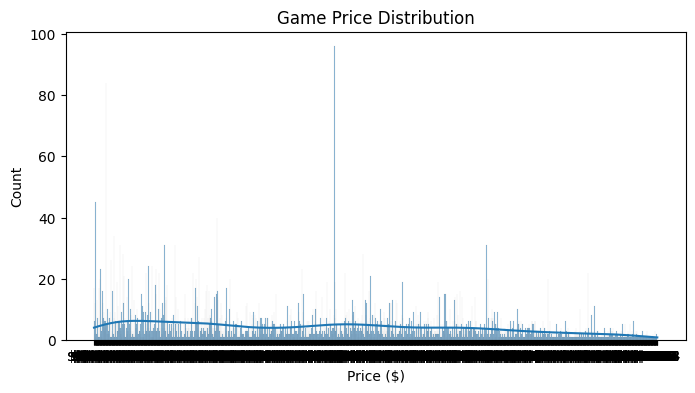

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True)
plt.title("Game Price Distribution")
plt.xlabel("Price ($)")
plt.show()
print()



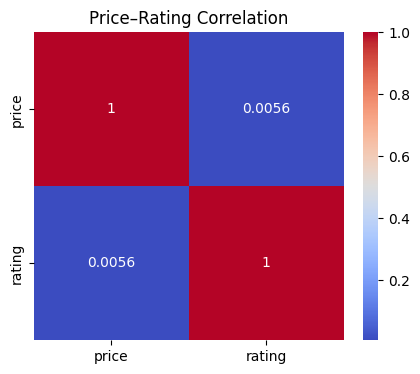

In [6]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
plt.figure(figsize=(5,4))
sns.heatmap(df[['price', 'rating']].corr(), annot=True, cmap="coolwarm")
plt.title("Price–Rating Correlation")
plt.show()
print()



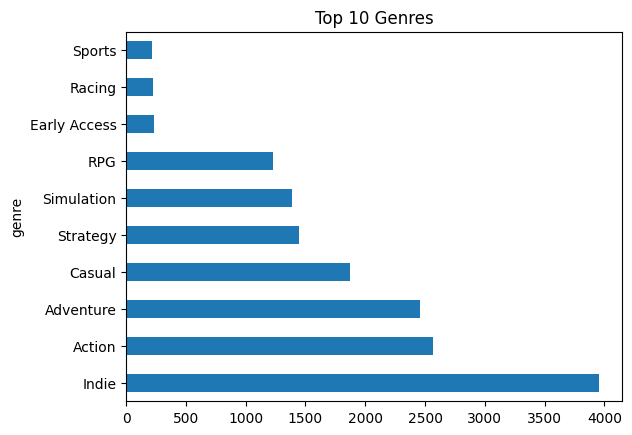

In [7]:
top_genres = df['genre'].str.split(',').explode().value_counts().head(10)
top_genres.plot(kind="barh", title="Top 10 Genres")
plt.show()
print()

# Hypothesis Testing

Here, we test statistical hypotheses to derive insights from the data.  

**Examples:**  
- *Do free games have higher ratings than paid games?*  
- *Are ratings significantly different across popular genres?*  

We use:  
- **T-tests** to compare two groups (free vs. paid games).  
- **ANOVA** to compare ratings across multiple genres.  
- **Pearson correlation** to measure relationships (e.g., price vs. rating).  

The results will help validate or reject assumptions about game performance.


In [8]:
#Compare free vs paid games
free = df[df['price']==0]['rating']
paid = df[df['price']>0]['rating']

t, p = ttest_ind(free, paid, nan_policy='omit')
print(f"T-test Free vs Paid Games:\nT={t:.2f}, P-value={p:.4f}")

#ANOVA: Ratings across top genres
top_tags = df['genre'].str.split(',').explode().value_counts().head(5).index
groups = [df[df['genre'].str.contains(tag, na=False)]['rating'] for tag in top_tags]
f, p_anova = f_oneway(*groups)
print(f"ANOVA among Top Genres:\nF={f:.2f}, P-value={p_anova:.4f}")

#Pearson correlation: Price vs Rating
r, p_corr = pearsonr(df['price'], df['rating'])
print(f"Pearson Correlation Price vs Rating:\nr={r:.2f}, P-value={p_corr:.4f}")


T-test Free vs Paid Games:
T=-0.04, P-value=0.9651
ANOVA among Top Genres:
F=5.41, P-value=0.0002
Pearson Correlation Price vs Rating:
r=0.01, P-value=0.6559


# Machine Learning: Predicting Game Popularity

In this section, we build a machine learning model to predict whether a game is "popular" based on its price and rating.  

Steps:  
1. Define the target variable (`popular`) based on rating.  
2. Split data into training and testing sets.  
3. Train a **Random Forest Classifier**.  
4. Evaluate the model using classification metrics (precision, recall, F1-score).  

This demonstrates how ML can be applied to predict player engagement and game success.


In [9]:
#Define popularity: above median rating
df['popular'] = (df['rating'] > df['rating'].median()).astype(int)

#Features and target
X = df[['price', 'rating']]
y = df['popular']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#Evaluate
print("Classification Report:\n", classification_report(y_test, clf.predict(X_test)))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       953

    accuracy                           1.00      1883
   macro avg       1.00      1.00      1.00      1883
weighted avg       1.00      1.00      1.00      1883



# Machine Learning: Predicting Game Ratings

Here, we train a **Random Forest Regressor** to predict the numeric rating of a game based on its features.  

Steps:  
1. Train the model on the training data.  
2. Make predictions on the test set.  
3. Evaluate the model using RMSE (Root Mean Squared Error).  

This step showcases advanced analytics that can be used in gaming companies to estimate player feedback before launch.


In [10]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

preds = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("Regression RMSE:", rmse)


Regression RMSE: 0.0


# Feature Importance

We analyze which features have the biggest impact on predicting game popularity and ratings.  

Visualizing feature importance helps explain the model’s decision-making process and provides insights for game developers to prioritize key factors like pricing and user experience.


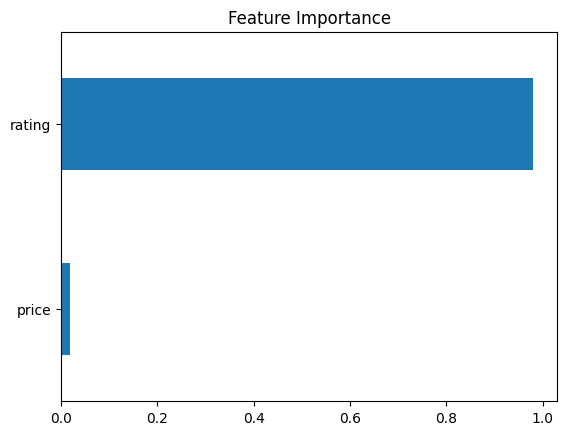

In [11]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.plot(kind="barh", title="Feature Importance")
plt.show()


# Project Summary

In this notebook, we performed an end-to-end analysis of Steam game data:  

✅ Cleaned and explored the dataset.  
✅ Visualized price, ratings, and genre trends.  
✅ Performed hypothesis testing to compare game categories.  
✅ Built machine learning models for predicting popularity and ratings.  

**Key Skills Demonstrated**: Data cleaning, EDA, hypothesis testing, ML modeling, visualization, and interpretation of results.  

This project highlights how data science and machine learning can be applied in the gaming industry to understand player behavior and support business decisions.
